In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df["Loan_Status"].value_counts()  # this dataset is imbalanced

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df["Loan_Status"].replace({"Y":1, "N":0},inplace=True) 

In [8]:
df["Loan_Status"].value_counts()  

1    422
0    192
Name: Loan_Status, dtype: int64

In [9]:
df["Gender"].replace({"Male":1, "Female":0}, inplace=True)

In [10]:
df["Married"] = pd.get_dummies(df["Married"], drop_first=True)

In [11]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
type(df["Dependents"].iloc[0])

str

In [13]:
df["Dependents"].replace({"0":0, "1":1, "2":2, "3+":3}, inplace=True)

In [14]:
df["Dependents"].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [15]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
df["Education"] = pd.get_dummies(df["Education"], drop_first=True)

In [17]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df["Self_Employed"] = pd.get_dummies(df["Self_Employed"], drop_first=True)

In [19]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,0.368995,0.175970,0.049258,-0.005903,0.053989,0.083946,0.106947,-0.075117,0.016337,0.019857
Married,0.368995,1.000000,0.343417,0.017671,0.008491,0.050194,0.080496,0.148367,-0.104608,0.001259,0.084281
Dependents,0.175970,0.343417,1.000000,0.059161,0.057888,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
Education,0.049258,0.017671,0.059161,1.000000,-0.010383,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.085884
Self_Employed,-0.005903,0.008491,0.057888,-0.010383,1.000000,0.127180,-0.016100,0.117421,-0.034361,-0.002362,-0.003700
ApplicantIncome,0.053989,0.050194,0.118679,-0.140760,0.127180,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.083946,0.080496,0.027259,-0.062290,-0.016100,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.106947,0.148367,0.163997,-0.171133,0.117421,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.075117,-0.104608,-0.100484,-0.078784,-0.034361,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,0.016337,0.001259,-0.050082,-0.081822,-0.002362,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678


(11, 0)

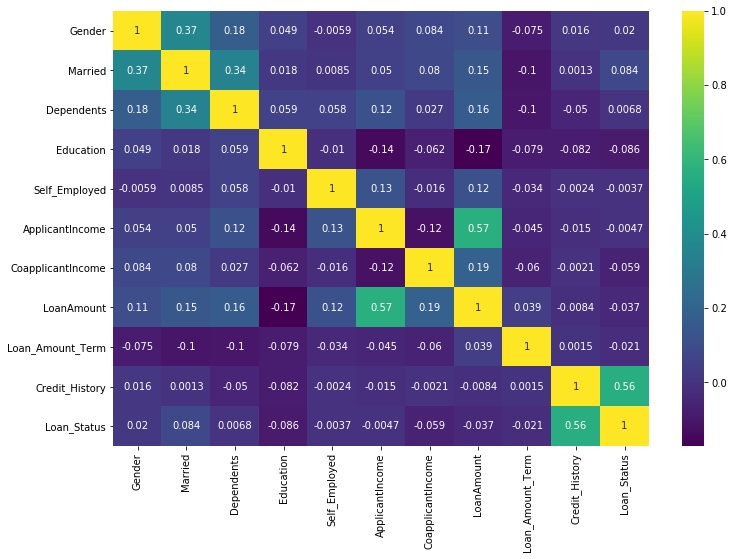

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.ylim(11,0)

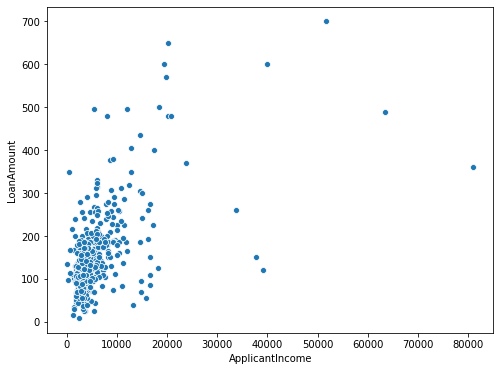

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df)

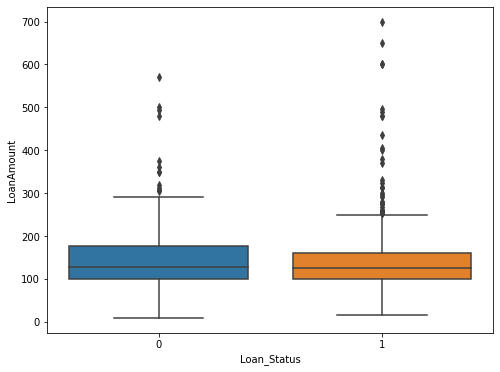

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df)

In [25]:
df.groupby("Loan_Status")["LoanAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
0,181.0,151.220994,85.862783,9.0,100.0,129.0,176.0,570.0
1,411.0,144.294404,85.484607,17.0,100.0,126.0,161.0,700.0


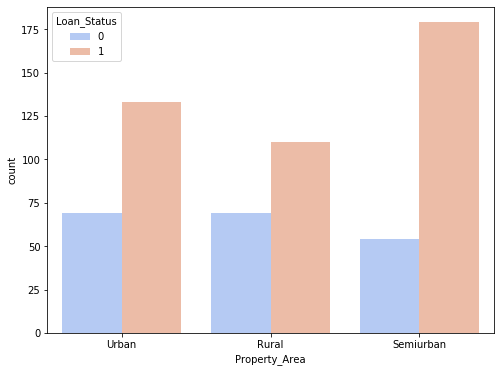

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette="coolwarm")

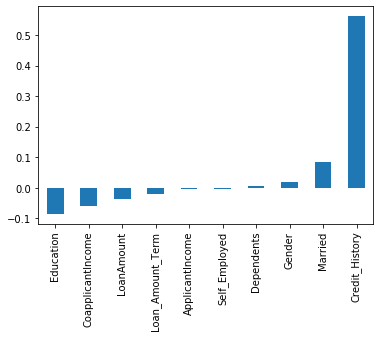

In [27]:
df.corr()["Loan_Status"].sort_values().drop("Loan_Status").plot(kind="bar")

### Preprocessing

In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
100*df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.000000
Dependents           2.442997
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [30]:
df.corr()["Gender"]

Gender               1.000000
Married              0.368995
Dependents           0.175970
Education            0.049258
Self_Employed       -0.005903
ApplicantIncome      0.053989
CoapplicantIncome    0.083946
LoanAmount           0.106947
Loan_Amount_Term    -0.075117
Credit_History       0.016337
Loan_Status          0.019857
Name: Gender, dtype: float64

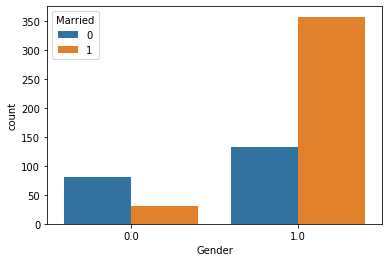

In [31]:
sns.countplot(df["Gender"],hue=df["Married"])

In [32]:
df2=df.copy()

In [33]:
def fill_nan(x1,x2):
    if np.isnan(x1):
        if x2 == 1:
            return 1
        else: return 0
    else: return x1

In [34]:
df["Gender"] = df.apply(lambda x: fill_nan(x["Gender"],x["Married"]),axis=1)

In [35]:
df["Gender"].isnull().sum() 

0

In [36]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
df.corr()["Credit_History"]

Gender               0.007382
Married              0.001259
Dependents          -0.050082
Education           -0.081822
Self_Employed       -0.002362
ApplicantIncome     -0.014715
CoapplicantIncome   -0.002056
LoanAmount          -0.008433
Loan_Amount_Term     0.001470
Credit_History       1.000000
Loan_Status          0.561678
Name: Credit_History, dtype: float64

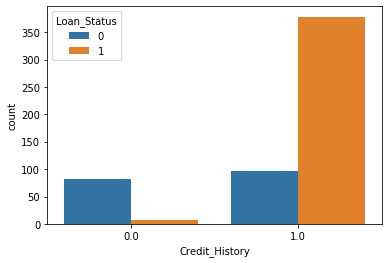

In [38]:
sns.countplot(df["Credit_History"],hue=df["Loan_Status"])

In [39]:
df["Credit_History"] = df.apply(lambda x: fill_nan(x["Credit_History"],x["Loan_Status"]),axis=1)

In [40]:
df["Credit_History"].isnull().sum()

0

In [41]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df.corr()["Dependents"]

Gender               0.170742
Married              0.343417
Dependents           1.000000
Education            0.059161
Self_Employed        0.057888
ApplicantIncome      0.118679
CoapplicantIncome    0.027259
LoanAmount           0.163997
Loan_Amount_Term    -0.100484
Credit_History      -0.058055
Loan_Status          0.006781
Name: Dependents, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD8A3C8>,
      dtype=object)

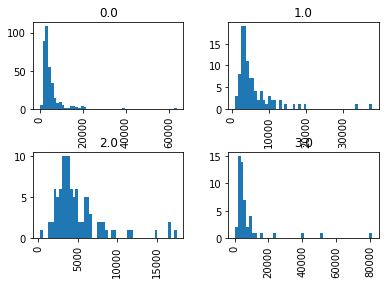

In [43]:
df.hist(column="ApplicantIncome",by="Dependents",bins=50)

In [44]:
df.corr()["Dependents"]

Gender               0.170742
Married              0.343417
Dependents           1.000000
Education            0.059161
Self_Employed        0.057888
ApplicantIncome      0.118679
CoapplicantIncome    0.027259
LoanAmount           0.163997
Loan_Amount_Term    -0.100484
Credit_History      -0.058055
Loan_Status          0.006781
Name: Dependents, dtype: float64

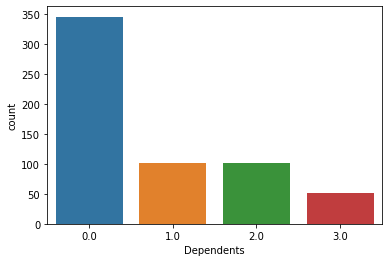

In [45]:
sns.countplot(df["Dependents"])

In [46]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [47]:
df.corr()['Loan_Amount_Term']

Gender              -0.077310
Married             -0.104608
Dependents          -0.102028
Education           -0.078784
Self_Employed       -0.034361
ApplicantIncome     -0.045306
CoapplicantIncome   -0.059878
LoanAmount           0.039447
Loan_Amount_Term     1.000000
Credit_History      -0.003354
Loan_Status         -0.021268
Name: Loan_Amount_Term, dtype: float64

In [48]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [49]:
df["Total_Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

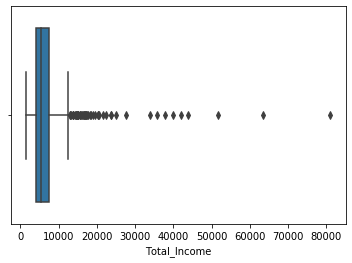

In [50]:
sns.boxplot(df["Total_Income"])

In [51]:
df["Total_Income_Log"] = np.log(df["Total_Income"])

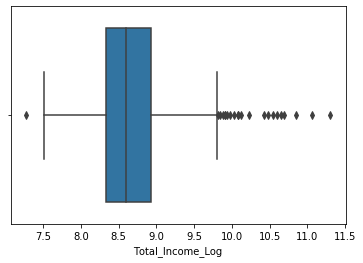

In [52]:
sns.boxplot(df["Total_Income_Log"])

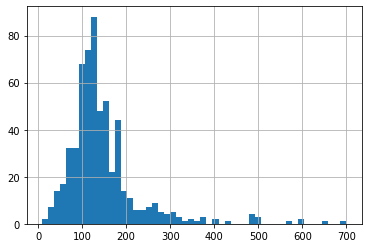

In [53]:
df['LoanAmount'].hist(bins=50)

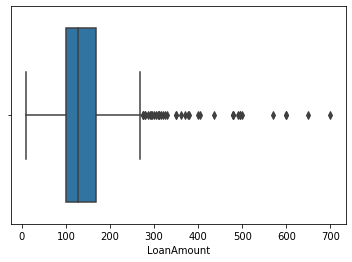

In [54]:
sns.boxplot(df['LoanAmount'])

In [55]:
df["LoanAmount_Log"] = np.log(df["LoanAmount"])

In [56]:
df.drop(["ApplicantIncome","CoapplicantIncome","Total_Income","LoanAmount"], axis=1, inplace=True)

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_Log,LoanAmount_Log
0,LP001002,1.0,0,0.0,0,0,360.0,1.0,Urban,1,8.674026,NaN
1,LP001003,1.0,1,1.0,0,0,360.0,1.0,Rural,0,8.714568,4.852030
2,LP001005,1.0,1,0.0,0,1,360.0,1.0,Urban,1,8.006368,4.189655
3,LP001006,1.0,1,0.0,1,0,360.0,1.0,Urban,1,8.505323,4.787492
4,LP001008,1.0,0,0.0,0,0,360.0,1.0,Urban,1,8.699515,4.948760


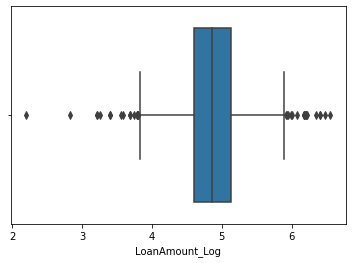

In [58]:
sns.boxplot(df["LoanAmount_Log"])

In [59]:
df["LoanAmount_Log"].fillna(df["LoanAmount_Log"].median(),inplace=True)

In [60]:
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income_Log    0
LoanAmount_Log      0
dtype: int64

In [61]:
dummies = pd.get_dummies(df["Property_Area"], drop_first=True)
dummies

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [62]:
df = pd.concat([df.drop("Property_Area", axis=1), dummies], axis=1)

In [63]:
df.drop("Loan_ID", axis=1, inplace=True)

In [64]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_Log,LoanAmount_Log,Semiurban,Urban
0,1.0,0,0.0,0,0,360.0,1.0,1,8.674026,4.852030,0,1
1,1.0,1,1.0,0,0,360.0,1.0,0,8.714568,4.852030,0,0
2,1.0,1,0.0,0,1,360.0,1.0,1,8.006368,4.189655,0,1
3,1.0,1,0.0,1,0,360.0,1.0,1,8.505323,4.787492,0,1
4,1.0,0,0.0,0,0,360.0,1.0,1,8.699515,4.948760,0,1


In [428]:
from sklearn.model_selection import train_test_split
# Train-test split
X = df.drop("Loan_Status",axis=1).values
y = df["Loan_Status"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [440]:
# Normalizing Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [441]:
# Creating the Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [442]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(3, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(units=1, activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam")

In [443]:
early_stop = EarlyStopping(patience=10, verbose=1,monitor="val_loss",mode="min")

In [444]:
model.fit(x= X_train,
          y= y_train,
          epochs=200,
          batch_size=10,
          validation_data=(X_test,y_test),
          callbacks = [early_stop],
         )

Train on 491 samples, validate on 123 samples
Epoch 1/200
491/491 [==============================] - 1s 2ms/sample - loss: 0.6971 - val_loss: 0.6783
Epoch 2/200
491/491 [==============================] - 0s 308us/sample - loss: 0.6679 - val_loss: 0.6650
Epoch 3/200
491/491 [==============================] - 0s 271us/sample - loss: 0.6501 - val_loss: 0.6522
Epoch 4/200
491/491 [==============================] - 0s 295us/sample - loss: 0.6315 - val_loss: 0.6406
Epoch 5/200
491/491 [==============================] - 0s 269us/sample - loss: 0.6223 - val_loss: 0.6289
Epoch 6/200
491/491 [==============================] - 0s 277us/sample - loss: 0.6026 - val_loss: 0.6148
Epoch 7/200
491/491 [==============================] - 0s 265us/sample - loss: 0.5821 - val_loss: 0.6003
Epoch 8/200
491/491 [==============================] - 0s 269us/sample - loss: 0.5593 - val_loss: 0.5787
Epoch 9/200
491/491 [==============================] - 0s 263us/sample - loss: 0.5363 - val_loss: 0.5605
Epoch 10/20

<Figure size 720x432 with 0 Axes>

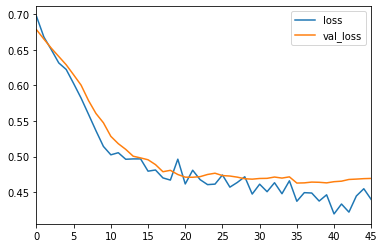

In [445]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(10,6))
losses[["loss","val_loss"]].plot()

In [446]:
from sklearn.metrics import classification_report, confusion_matrix

In [447]:
predictions = model.predict_classes(X_test)

In [448]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[22 21]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67        43
           1       0.79      0.99      0.88        80

    accuracy                           0.82       123
   macro avg       0.87      0.75      0.77       123
weighted avg       0.85      0.82      0.80       123

